In [1]:
import numpy as np
import pandas as pd 

In [2]:
anime_df = pd.read_csv('anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime_rating= pd.read_csv('anime_rating.csv')
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df= pd.merge(anime_df, anime_rating, on='anime_id')

In [5]:
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
df.groupby('name')['rating_x'].mean().sort_values(ascending=False).head()

name
Mogura no Motoro                    9.50
Kimi no Na wa.                      9.37
Fullmetal Alchemist: Brotherhood    9.26
Gintama°                            9.25
Yakusoku: Africa Mizu to Midori     9.25
Name: rating_x, dtype: float64

In [8]:
df.groupby('name')['rating_x'].count().sort_values(ascending=False).head()

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
Name: rating_x, dtype: int64

In [9]:
ratings=pd.DataFrame(df.groupby('name')['rating_x'].mean())
ratings.head()

,rating_x
name,
&quot;0&quot;,5.06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06
&quot;Bungaku Shoujo&quot; Memoire,7.54
&quot;Bungaku Shoujo&quot; Movie,7.63


In [10]:
ratings['num of ratings']=pd.DataFrame(df.groupby('name')['rating_x'].count())
ratings.head()

,rating_x,num of ratings
name,,
&quot;0&quot;,5.06,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,782
&quot;Bungaku Shoujo&quot; Memoire,7.54,809
&quot;Bungaku Shoujo&quot; Movie,7.63,1535


<AxesSubplot: >

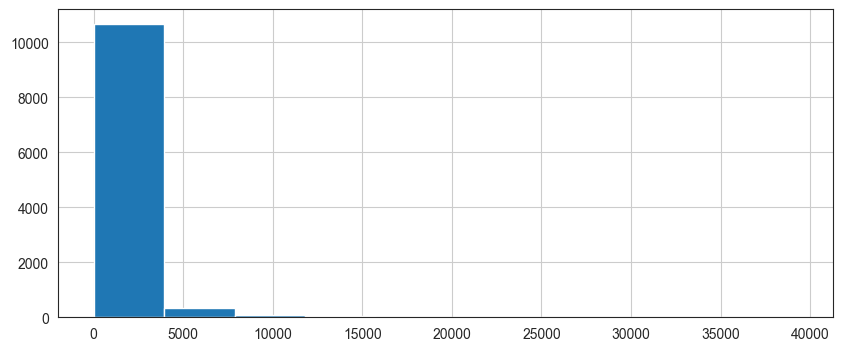

In [11]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=10)

<AxesSubplot: >

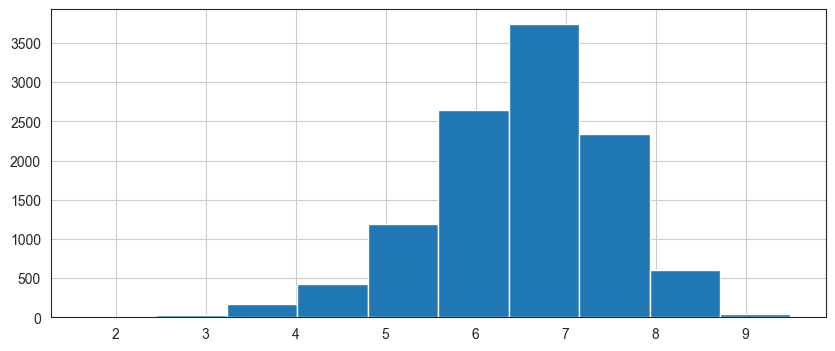

In [12]:
plt.figure(figsize=(10,4))
ratings['rating_x'].hist(bins=10)

In [13]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating_x,num of ratings
name,,
Death Note,8.71,39340
Sword Art Online,7.83,30583
Shingeki no Kyojin,8.54,29584
Code Geass: Hangyaku no Lelouch,8.83,27718
Elfen Lied,7.85,27506


In [17]:
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [18]:
moviemat = df.pivot_table(index='user_id',columns='name',values='rating_x')
moviemat.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.11,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating_x,num of ratings
name,,
Death Note,8.71,39340
Sword Art Online,7.83,30583
Shingeki no Kyojin,8.54,29584
Code Geass: Hangyaku no Lelouch,8.83,27718
Elfen Lied,7.85,27506
Angel Beats!,8.39,27183
Naruto,7.81,25925
Fullmetal Alchemist,8.33,25032
Fullmetal Alchemist: Brotherhood,9.26,24574


In [20]:
naruto_user_ratings=moviemat['Naruto']
deathnote_user_ratings=moviemat['Death Note']

In [25]:
naruto_user_ratings.head()


user_id
1    7.81
2     NaN
3    7.81
4     NaN
5    7.81
Name: Naruto, dtype: float64

In [24]:
deathnote_user_ratings.head()

user_id
1     NaN
2     NaN
3    8.71
4    8.71
5    8.71
Name: Death Note, dtype: float64

In [26]:
ilike_naruto=moviemat.corrwith(naruto_user_ratings)
ilike_deathnote=moviemat.corrwith(deathnote_user_ratings)

C:\Users\R3i\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\R3i\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\R3i\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\R3i\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np

In [43]:
like_naruto=pd.DataFrame(ilike_naruto,columns=['Correlations'])
like_naruto.dropna(inplace=True)
like_naruto.sort_values('Correlations',ascending=False).head(10)


,Correlations
name,
&quot;0&quot;,1.0
Futakoi,1.0
Kaguya-hime no Monogatari,1.0
Kagewani: Shou,1.0
Kagewani,1.0
Kage kara Mamoru!,1.0
Kachou no Koi,1.0
Sugar Sugar Rune,1.0
K-On!: Ura-On!,1.0


In [44]:
like_naruto=like_naruto.join(ratings['num of ratings'])
like_naruto.head()

,Correlations,num of ratings
name,,
&quot;0&quot;,1.0,26
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,1.0,782
&quot;Bungaku Shoujo&quot; Memoire,1.0,809
&quot;Bungaku Shoujo&quot; Movie,-1.0,1535
.hack//G.U. Returner,-1.0,730


In [45]:
like_naruto[like_naruto['num of ratings']>100].sort_values('Correlations',ascending=False).head()

,Correlations,num of ratings
name,,
Lamune,1.0,1281
Girls Bravo: Second Season,1.0,3210
One Piece Recap,1.0,472
One Piece: Episode of Alabasta - Prologue,1.0,120
One Piece: Jango no Dance Carnival,1.0,1518


In [47]:
like_deathnote=pd.DataFrame(ilike_deathnote,columns=['Correlations'])
like_deathnote.dropna(inplace=True)
like_deathnote=like_deathnote.join(ratings['num of ratings'])
like_deathnote[like_deathnote['num of ratings']>100].sort_values('Correlations',ascending=False).head()

,Correlations,num of ratings
name,,
xxxHOLiC Shunmuki,1.0,1974
Higashi no Eden: Falling Down,1.0,596
Pugyuru,1.0,107
Higashi no Eden,1.0,10667
Hidamari Sketch: Sae Hiro Sotsugyou-hen,1.0,190
